In [1]:
import pandas as pd
from geopy.distance import geodesic  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
merged_dataset = pd.read_csv('/Users/enrista/Downloads/MarshMcLennan/EDA/merged_hurricane_vessel.csv')

In [3]:
merged_dataset

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,...,50-knot Wind Radii SW,50-knot Wind Radii NW,64-knot Wind Radii NE,64-knot Wind Radii SE,64-knot Wind Radii SW,64-knot Wind Radii NW,Speed mph,hurricane_datetime,impacted,PathChange
0,563135300,2022-08-31 12:00:00,32.11997,-79.93341,0.0,270.9,179.0,WAN HAI 625,IMO9298997,9V7324,...,0.0,0.0,0.0,0.0,0.0,0.0,11.784165,2022-08-31 12:00:00,False,stayed on course
1,636092896,2022-08-31 12:00:00,40.49470,-73.66555,0.1,299.4,299.0,CCNI ANGOL,IMO9683867,D5GZ4,...,0.0,0.0,0.0,0.0,0.0,0.0,11.784165,2022-08-31 12:00:00,False,stayed on course
2,373457000,2022-08-31 12:00:00,36.62089,-75.54031,11.2,336.6,337.0,MOL MAESTRO,IMO9415727,3EKT9,...,0.0,0.0,0.0,0.0,0.0,0.0,11.784165,2022-08-31 12:00:00,False,stayed on course
3,211779000,2022-08-31 12:00:00,27.72167,-78.49475,22.2,255.3,253.0,NORTHERN MAJESTIC,IMO9252565,DCPP2,...,0.0,0.0,0.0,0.0,0.0,0.0,11.784165,2022-08-31 12:00:00,False,stayed on course
4,636021760,2022-08-31 12:00:00,36.14663,-74.65842,17.5,12.7,12.0,MSC TAMPA,IMO9317925,5LFN8,...,0.0,0.0,0.0,0.0,0.0,0.0,11.784165,2022-08-31 12:00:00,False,stayed on course
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70618,356579000,2023-09-30 18:00:00,26.46187,-79.07851,0.7,289.5,340.0,MSC DON GIOVANNI,IMO9102746,3FIV6,...,0.0,0.0,0.0,0.0,0.0,0.0,16.588336,2023-09-30 18:00:00,False,stayed on course
70619,636015150,2023-09-30 18:00:00,39.56786,-75.55874,6.7,307.4,311.0,GREEN WARRIOR,IMO9514169,A8YX9,...,0.0,0.0,0.0,0.0,0.0,0.0,5.672616,2023-09-30 18:00:00,False,veered off course
70620,366235000,2023-09-30 18:00:00,32.84911,-79.93635,0.0,175.1,56.0,CAPE DOMINGO,IMO7229423,WMHV,...,0.0,0.0,0.0,0.0,0.0,0.0,16.588336,2023-09-30 18:00:00,False,stopped
70621,316004370,2023-09-30 18:00:00,44.59595,-75.66480,11.9,49.5,52.0,G3 MARQUIS,IMO9613941,XJBO,...,0.0,0.0,0.0,0.0,0.0,0.0,5.672616,2023-09-30 18:00:00,False,veered off course


In [4]:
# keeping rows only where vessels that were impacted
values_to_keep = ['veered off course', 'stopped', 'turned around']
impacted_df = merged_dataset[merged_dataset['PathChange'].isin(values_to_keep)]

## Length and Width

In [6]:
# average ship length?
average_length = impacted_df['Length'].mean()
average_length

275.43337791015745

In [7]:
# Width?
average_width = impacted_df['Width'].mean()
average_width

38.28893423383377

## Outliers

In [9]:
# Outliers?
Q1 = impacted_df['Length'].quantile(0.25)
Q3 = impacted_df['Length'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = impacted_df[(impacted_df['Length'] < lower_bound) | (impacted_df['Length'] > upper_bound)]
outliers

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,...,50-knot Wind Radii SW,50-knot Wind Radii NW,64-knot Wind Radii NE,64-knot Wind Radii SE,64-knot Wind Radii SW,64-knot Wind Radii NW,Speed mph,hurricane_datetime,impacted,PathChange


In [10]:
print(lower_bound)
print(upper_bound)

115.5
415.5


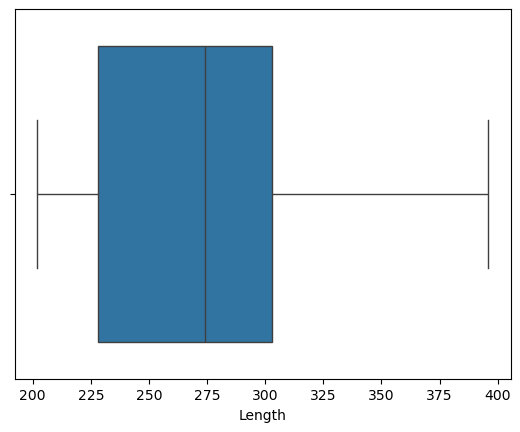

In [11]:
# Create a boxplot for the 'Length' column
sns.boxplot(x=impacted_df['Length'])

# Display the plot
plt.show()

## Question: Does length and width affect how impacted a vessel is?

/var/folders/cw/d5zl1dn57qv3zh5xhbmwp0rc0000gn/T/ipykernel_56405/1059841712.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impacted_df.loc[:, 'color'] = impacted_df['PathChange'].map(colors)


<Figure size 1000x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

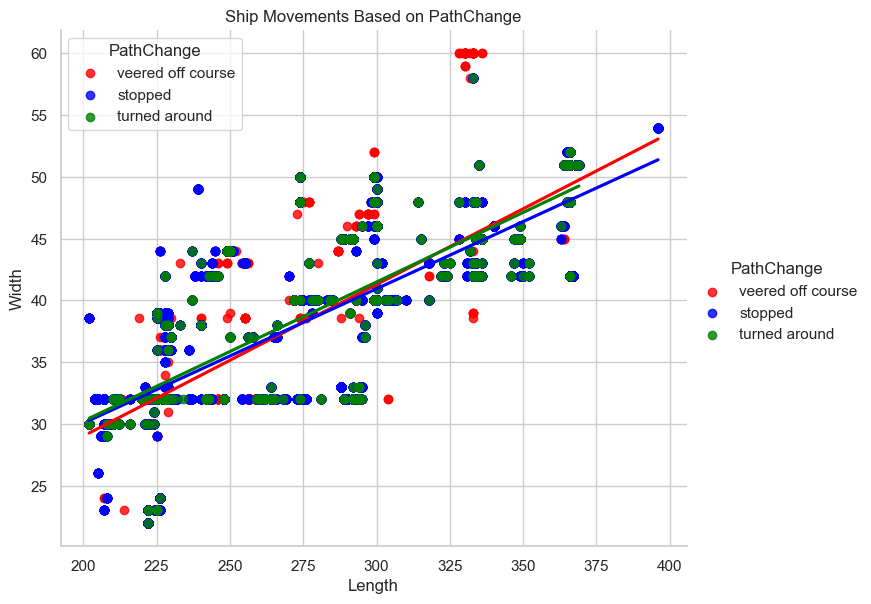

In [13]:
# Set the plot style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))

colors = {
    'veered off course': 'red',
    'stopped': 'blue',
    'turned around': 'green'
}

# Create a color column based on PathChange
impacted_df.loc[:, 'color'] = impacted_df['PathChange'].map(colors)

# Plot the data using length and width
plt.figure(figsize=(8, 6))
sns.lmplot(x='Length', y='Width', hue='PathChange', data=impacted_df, palette=colors, ci=None, markers='o', height=6, aspect=1.2) # line of best fit

# Add labels and title
plt.title('Ship Movements Based on PathChange')
plt.xlabel('Length')
plt.ylabel('Width')

# Show the legend
plt.legend(title='PathChange')

# Show the plot
plt.show()

1. Pearson Correlation (default in pandas):
The Pearson correlation coefficient measures the linear relationship between two variables. The value ranges between -1 and 1, where:
* 1: Perfect positive linear relationship.
* 0: No linear relationship.
* -1: Perfect negative linear relationship.

When to Use Pearson, Spearman, and Kendall:
* Pearson: When the relationship is linear and data is continuous.
* Spearman: For non-linear relationships but monotonic data (variables that move in the same direction).
* Kendall: For ordinal data or small datasets.

In [15]:
'''
groupby('PathChange'): Groups the DataFrame based on each unique label in the PathChange column.
[['Length', 'Width']]: Selects only the Length and Width columns for correlation computation.
.corr(method='pearson'): Computes the Pearson correlation for each group.
.unstack().iloc[:, 1]: Extracts the relevant Length-Width correlation from the correlation matrix.
'''
grouped = impacted_df.groupby('PathChange')[['Length', 'Width']]

# Pearson correlation for each group
correlation_by_pathchange = grouped.corr(method='pearson').unstack().iloc[:, 1]  # Extract only the Length-Width correlation

# Display the correlation between Length and Width for each PathChange label
print(correlation_by_pathchange)

PathChange
stopped              0.727805
turned around        0.744527
veered off course    0.760124
Name: (Length, Width), dtype: float64
